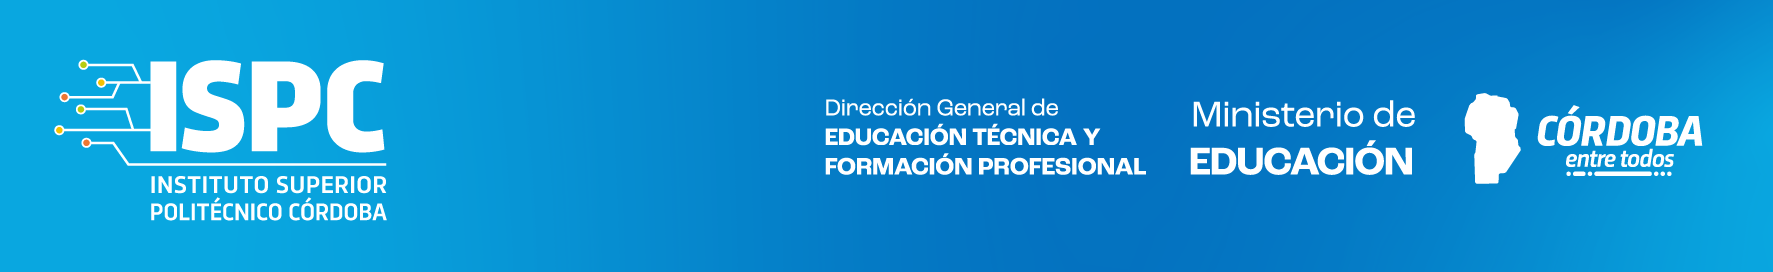

<br>
<br>

# Evidencia N° 5



<br>

# **Presentación de Analista de Datos: 26/09**



### Docentes:
- Marcos Ugarte
- Nahuel Pratta






### Alumnos Integrantes:
- Erick López
- Christian Nüesch
- Débora Zurita


<br>
<br>

pie_de_página.png

<br>
<br>

# **1. Carga y Preparación del Dataset**



Lo primero que hacemos es cargar el conjunto de datos en el entorno de trabajo. Al mismo tiempo, nos aseguramos de que los datos se hayan cargado correctamente y se encuentren en el formato adecuado.

<br>

Para cargar el conjunto de datos, se utiliza  la librería "Pandas" en Python. Sin embargo, como también se emplean otras librerías, se opta por cargarlas todas desde el inicio. Facilitando así, el entendimiento y siguiendo las buenas prácticas en la organización del código.

<br>
<br>


In [ ]:
# Importamos las librerías necesarias para cargar el dataset y
# realizar análisis posteriores
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuramos Pandas para mostrar los números flotantes con dos decimales,
# evitando así la notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<br>


In [ ]:
# URL del del dataset en GitHub
url = 'https://raw.githubusercontent.com/ISPC-TSCDIA/Data24_PPI/main/datos/autos_argentina_curado.csv'

<br>

In [ ]:
# Cargamos el archivo en un data frame de Pandas y lo asignamos a la variable 'data'
# Se usa la variable url definida en la celda anterior para leer el archivo desde la URL
data = pd.read_csv(url)
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio,Moneda,Año_zscore
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,10850000,pesos,1.55
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500,dólares,1.55
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,5800000,pesos,0.74
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500,dólares,1.55
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000,dólares,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,5250000,pesos,0.47
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000,dólares,0.74
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,3960000,pesos,0.20
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900,dólares,0.74


<br>

Para resolver los conflictos que surgían al cargar el dataset, hemos decidido asegurar que los datos en la columna `Precio` sean de tipo numérico. Esta medida soluciona varios problema

<br>

El comando `to_numeric` convierte todos los valores de la columna `Precio` a un formato numérico (`float` o `int`). Si encuentra algún valor no convertible, la opción `errors='coerce'` lo transformará en `NaN`, lo cual es útil para evitar errores inesperados

<br>


In [ ]:
# Convertimos los valores de la columna 'Precio' a tipo numérico
data['Precio'] = pd.to_numeric(data['Precio'], errors='coerce')

# Verificamos los tipos de datos de todas las columnas
print(data.dtypes)


Marca           object
Modelo          object
Año              int64
Color           object
Combustible     object
Puertas          int64
Caja            object
Motor          float64
Carrocería      object
Kilómetros       int64
Precio           int64
Moneda          object
Año_zscore     float64
dtype: object


<br>

En los datos recolectados, se encuentran registros de vehículos en pesos y en dólares. Para unificar la moneda, realizamos una transformación en el dataframe para convertir todos los valores a dólares.

<br>

Optamos por esta alternativa considerando la posibilidad de añadir más registros en el futuro, lo que garantiza que todos los datos estén en una moneda constante y unificada.

<br>

Sin esta unificación, los análisis quedarían sesgados. La primera visualización del dataset muestra una gran diferencia nominal debido a la brecha cambiaria.

<br>

**Elección del tipo de cambio**

En Argentina, el tipo de cambio paralelo, conocido como "dólar blue", ofrece una mejor representación de la realidad económica para dolarizar precios en un dataset, especialmente para bienes de alto valor como vehículos. Esto se debe a que refleja de manera más precisa el acceso real a dólares, el poder adquisitivo y un ajuste más fiel a la realidad económica. Por lo tanto, utilizar el tipo de cambio paralelo puede mejorar la capacidad predictiva de los modelos. En conclusión, el tipo de cambio paralelo ofrece una mejor representación de la realidad económica de las transacciones de vehículos en Argentina.

<br>

**Tipo de cambio con el que se trabajará:** 1USD = 380ARS

Fuente de la cotización: https://dolarhistorico.com/cotizacion-dolar-blue/mes/enero-2023

<br>


In [ ]:
# Definimos la tasa de cambio (1 USD = 380 ARS)
tipo_cambio = 380

# Función para convertir precios de pesos a dólares
def convertir_a_dolar(row):
    if row['Moneda'] == 'pesos':
        return row['Precio'] / tipo_cambio
    return row['Precio']

# Aplicamos la función a cada fila del dataframe
data['Precio'] = data.apply(convertir_a_dolar, axis=1)

# Verificamos el dataframe transformado
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio,Moneda,Año_zscore
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,28552.63,pesos,1.55
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500.00,dólares,1.55
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,15263.16,pesos,0.74
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500.00,dólares,1.55
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000.00,dólares,-0.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,13815.79,pesos,0.47
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000.00,dólares,0.74
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,10421.05,pesos,0.20
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900.00,dólares,0.74


<br>

Dado que las columnas `Moneda` y `Año_zscore` (esta última proveniente de otro análisis) ya no serán necesarias, las eliminamos del dataframe.

Para realizar esta acción utilizamos el método `drop()` de Pandas, donde:

- El parámetro `columns=['Moneda', 'Año_zscore']` especifica las columnas que se quieren eliminar

- `drop()` devuelve una copia del dataframe sin las columnas especificadas, por lo que reasignamos el resultado a `data`.

<br>


In [ ]:
# Eliminamos las columnas 'Moneda' y 'Año_zscore'
data = data.drop(columns=['Moneda', 'Año_zscore'])

# Verificamos el dataframe sin esas columnas
data


,Marca,Modelo,Año,Color,Combustible,Puertas,Caja,Motor,Carrocería,Kilómetros,Precio
0,Jeep,Compass,2022,Blanco,Nafta,5,Automática,2.40,SUV,500,28552.63
1,Jeep,Compass,2022,Gris oscuro,Nafta,5,Automática,2.40,SUV,500,35500.00
2,Toyota,Corolla,2019,Gris,Nafta,4,Manual,1.80,Sedán,9000,15263.16
3,Jeep,Compass,2022,Negro,Nafta,5,Automática,1.30,SUV,10500,34500.00
4,Kia,Sorento,2014,Negro,Diésel,5,Automática,2.20,SUV,156000,25000.00
...,...,...,...,...,...,...,...,...,...,...,...
495,Chevrolet,Tracker,2018,Gris,Nafta,5,Automática,1.80,SUV,52000,13815.79
496,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,49000,46000.00
497,Peugeot,2008,2017,Blanco,Nafta,5,Manual,1.60,SUV,75358,10421.05
498,Volkswagen,Amarok,2019,Gris,Diésel,4,Automática,3.00,Pick-Up,57500,44900.00


<br>
<br>

pie_de_página.png

<br>
<br>

# **2. Análisis de Correlación**



El análisis de correlación se utiliza para examinar la relación entre dos variables.  

<br>

A continuación, se detallan algunas de las relaciones que exploraremos:

- **Kilometraje vs. Precio:** Para ver si existe una relación entre el kilometraje recorrido y el precio del auto. **Se espera una correlación negativa**, ya que en general, a mayor kilometraje, el precio tiende a disminuir.

- **Año de fabricación vs. Precio:** Analizaremos si existe una **correlación positiva** entre el año del auto y su precio. Es probable que los autos más nuevos (años más recientes) tengan precios más altos.

- **Año de fabricación vs. Kilómetros:** Se analizará si los autos más antiguos han recorrido más kilómetros. Es **probable** que haya una **correlación negativa**, donde los autos más antiguos tengan mayor kilometraje acumulado, y los autos más nuevos, menos kilómetros, debido a su menor tiempo en uso.

-  **Motor vs. Precio:** Se analizará la relación entre la cilindrada del motor y el precio del auto. Es **probable** que haya una **correlación positiva**, donde los autos con motores más grandes (mayor cilindrada) tengan precios más altos, debido a su mayor potencia, prestaciones y costo de fabricación.


In [ ]:
# Para analizar las relaciones entre las variables, seleccionamos
# las columnas pertinentes (por ejemplo, Precio, Kilómetros, Año, Motor y Puertas):
matriz_correlacion = data[['Precio', 'Kilómetros', 'Año', 'Motor', 'Puertas' ]].corr()
matriz_correlacion


,Precio,Kilómetros,Año,Motor,Puertas
Precio,1.00,-0.27,0.24,0.56,-0.29
Kilómetros,-0.27,1.00,-0.68,-0.03,-0.07
Año,0.24,-0.68,1.00,0.02,0.07
Motor,0.56,-0.03,0.02,1.00,-0.23
Puertas,-0.29,-0.07,0.07,-0.23,1.00


**Recordamos** que cada celda de la matriz representa la correlación entre dos columnas. El valor de la celda indica tanto la fuerza como la dirección de la correlación.
<br>

*   **Valores cercanos a 1:** Indican una correlación **positiva fuerte**. Esto significa que, a medida que una variable aumenta, la otra también tiende a aumentar.
*   **Valores cercanos a -1:** Indican una correlación **negativa fuerte**. Esto significa que, a medida que una variable aumenta, la otra tiende a disminuir.
*   **Valores cercanos a 0:** Indican una correlación **débil o nula**. Esto sugiere que no hay una relación lineal clara entre las variables.
*   **La diagonal de la matriz siempre tendrá valores de 1**, ya que cada variable está perfectamente correlacionada consigo misma.





<br>

## Relación: Kilometraje vs. Precio

*(Relación: Negativa Débil)*

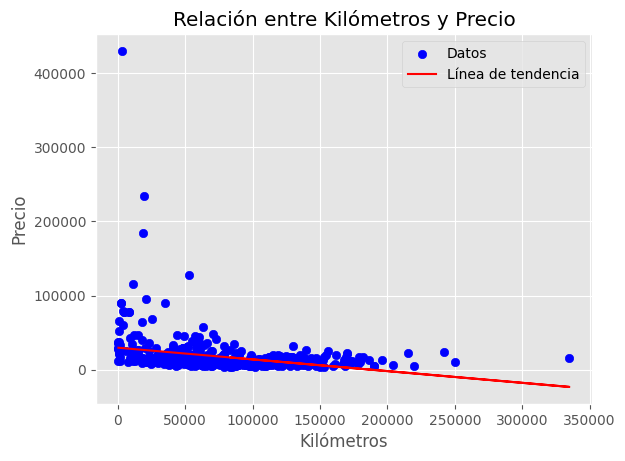



Coeficiente de correlación de Pearson: -0.2745467116167887
P-value: 4.2634107184032286e-10


In [ ]:
# Gráfico de dispersión
plt.scatter(data["Kilómetros"], data["Precio"], color='blue', label='Datos')
plt.title('Relación entre Kilómetros y Precio')
plt.xlabel("Kilómetros")
plt.ylabel("Precio")

# Línea de tendencia
m, b = np.polyfit(data["Kilómetros"], data["Precio"], 1)
plt.plot(data["Kilómetros"], m * data["Kilómetros"] + b, color='red', label='Línea de tendencia')

plt.legend()

plt.show()

# Cálculo de la correlación de Pearson
corr_test = pearsonr(data["Kilómetros"], data["Precio"])
print("\n")
print(f"Coeficiente de correlación de Pearson: {corr_test[0]}")
print(f"P-value: {corr_test[1]}")


**Observaciones**

*   **Concentración de Puntos:** Hay una alta concentración de puntos en la esquina inferior izquierda del gráfico. Esto **sugiere que la mayoría de los vehículos tienen un kilometraje bajo y un precio relativamente bajo**.
*   **Tendencia General:** A medida que los kilómetros aumentan, los precios tienden a disminuir. Esto indica una **correlación negativa entre el kilometraje y el precio**. En otras palabras, los vehículos con más kilómetros suelen tener precios más bajos.
*  **Dispersión de Datos:** Aunque la tendencia general muestra una disminución del precio con el aumento de kilómetros, hay una **dispersión considerable** en los datos. Esto significa que hay **vehículos con muchos kilómetros que aún tienen precios altos y viceversa**.

<br>

**Interpretación**
<br>

El gráfico y el test de correlación muestran una relación lineal negativa, de intensidad débil (r = -0.27) pero estadísticamente significativa (p-value = 4.26e-10). Aunque existe una relación entre los Kilómetros recorridos y el Precio, la baja magnitud del coeficiente de correlación sugiere que la influencia de los kilómetros sobre el precio es limitada. Por lo tanto, no sería ideal generar un modelo de regresión lineal simple utilizando solo los Kilómetros como variable predictora. Sería más apropiado considerar otras variables para mejorar la precisión del modelo.


<br>

## Relación: Año de fabricación vs. Precio

*(Relación: Positiva Débil)*


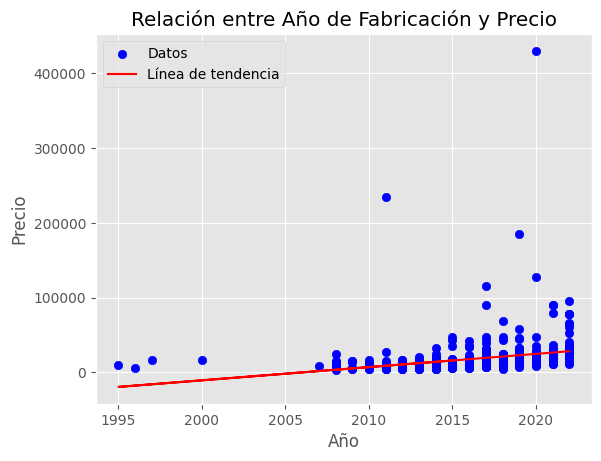



Coeficiente de correlación de Pearson: 0.2433406672207168
P-value: 3.5742632840020004e-08


In [ ]:
plt.scatter(data["Año"], data["Precio"], color='blue', label='Datos')
plt.title('Relación entre Año de Fabricación y Precio')
plt.xlabel("Año")
plt.ylabel("Precio")

m, b = np.polyfit(data["Año"], data["Precio"], 1)
plt.plot(data["Año"], m * data["Año"] + b, color='red', label='Línea de tendencia')

plt.legend()

plt.show()

corr_test = pearsonr(data["Año"], data["Precio"])
print("\n")
print(f"Coeficiente de correlación de Pearson: {corr_test[0]}")
print(f"P-value: {corr_test[1]}")


**Observaciones**<br>


*   **Concentración de Puntos:** Hay una alta **concentración de puntos en la parte inferior del gráfico**, lo que sugiere que la mayoría de los vehículos tienen **precios relativamente bajos**, independientemente del año de fabricación.
*   **Tendencia General:** A medida que el año de fabricación se **acerca a 2020**, hay algunos puntos que muestran **precios más altos**. Esto indica que los vehículos más nuevos tienden a tener precios más altos.
*   **Dispersión de Datos:** Aunque hay una tendencia general de precios más altos para vehículos más nuevos, hay una **dispersión considerable en los datos**. Esto significa que hay vehículos de años más antiguos que aún tienen precios altos y viceversa.

<br>

**Interpretación**<br>

El gráfico y el test de correlación indican una relación lineal positiva entre el Año de Fabricación y el Precio, aunque esta relación es débil (r = 0.24). A pesar de la baja intensidad de la correlación, el resultado es estadísticamente significativo (p-value = 3.57e-08), lo que sugiere que la relación observada no es debida al azar. Sin embargo, la baja magnitud del coeficiente de correlación implica que el Año de Fabricación tiene una influencia limitada sobre el Precio. Por lo tanto, no sería recomendable utilizar únicamente el Año de Fabricación como variable predictora en un modelo de regresión lineal simple para predecir el Precio.





<br>

## Relación: Año de fabricación vs. Kilómetros

*(Relación: Negativa Fuerte)*


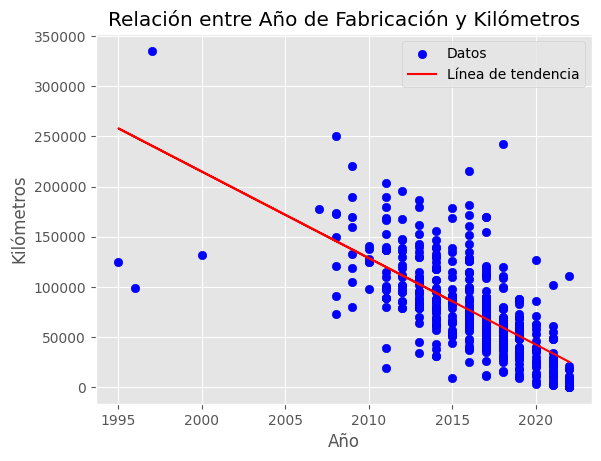



Coeficiente de correlación de Pearson: -0.6818333119854311
P-value: 1.2572213803870547e-69


In [ ]:
plt.scatter(data["Año"], data["Kilómetros"], color='blue', label='Datos')
plt.title('Relación entre Año de Fabricación y Kilómetros')
plt.xlabel("Año")
plt.ylabel("Kilómetros")

m, b = np.polyfit(data["Año"], data["Kilómetros"], 1)
plt.plot(data["Año"], m * data["Año"] + b, color='red', label='Línea de tendencia')

plt.legend()

plt.show()

corr_test = pearsonr(data["Año"], data["Kilómetros"])
print("\n")
print(f"Coeficiente de correlación de Pearson: {corr_test[0]}")
print(f"P-value: {corr_test[1]}")


**Observaciones**<br>


*   **Distribución de Puntos:** Los puntos están bastante dispersos en los primeros años, pero se vuelven más **densos y concentrados** en los **años más recientes**, lo que podría indicar una **mayor actividad o mejor registro de datos en esos años**.
*   **Tendencia General:** se puede observar que **los vehículos más antiguos tienden a tener más kilómetros acumulados**, lo cual es lógico ya que han estado en uso por más tiempo.
*   **Variabilidad en Kilómetros:** Hay una **gran variabilidad en los kilómetros acumulados** para vehículos de todos los años, lo que sugiere que **el uso de los vehículos varía ampliamente independientemente de su año de fabricación**.

<br>

**Interpretación**<br>

El gráfico y el test de correlación muestran una relación lineal negativa, de intensidad considerable (r = -0.68) y estadísticamente significativa (p-value = 1.26e-69). Esto indica que a medida que el Año de Fabricación aumenta, los Kilómetros recorridos tienden a disminuir de manera consistente. Dado el fuerte coeficiente de correlación, tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir los Kilómetros recorridos en función del Año de Fabricación del vehículo.



<br>

## Relación: Motor vs. Precio

*(Relación: Positiva Moderada)*


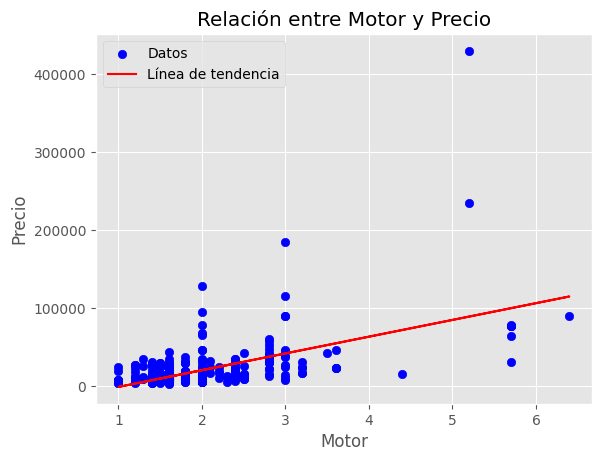



Coeficiente de correlación de Pearson: 0.561197757185673
P-value: 7.908328936609464e-43


In [ ]:
plt.scatter(data["Motor"], data["Precio"], color='blue', label='Datos')
plt.title('Relación entre Motor y Precio')
plt.xlabel("Motor")
plt.ylabel("Precio")

m, b = np.polyfit(data["Motor"], data["Precio"], 1)
plt.plot(data["Motor"], m * data["Motor"] + b, color='red', label='Línea de tendencia')

plt.legend()

plt.show()

corr_test = pearsonr(data["Motor"], data["Precio"])
print("\n")
print(f"Coeficiente de correlación de Pearson: {corr_test[0]}")
print(f"P-value: {corr_test[1]}")


**Observaciones**<br>


*   **Concentración de Puntos:** La mayoría de los puntos azules están concentrados en el cuadrante inferior izquierdo del gráfico, mostrando que la mayoría de los vehículos tienen motores pequeños y precios bajos.
*   **Distribución de Datos:** Hay una gran variabilidad en los precios para motores de tamaño similar.
*   **Outliers:** Existen algunos puntos fuera de la concentración principal que indican vehículos con motores más grandes y precios más altos.

<br>

**Interpretación**<br>

El gráfico y el test de correlación muestran una relación lineal positiva, de intensidad moderada (r = 0.56) y estadísticamente significativa (p-value = 7.91e-43). Esto indica que existe una asociación considerable entre el Tamaño del Motor y el Precio del vehículo, lo que sugiere que a medida que el tamaño del motor aumenta, el precio también tiende a aumentar. Dado el coeficiente de correlación moderado y la significancia estadística, tiene sentido intentar generar un modelo de regresión lineal con el objetivo de predecir el Precio en función del Motor.



<br>
<br>

## Matriz de Correlación

En este análisis se examinan las relaciones entre varias variables numéricas del dataset. La matriz de correlación se utiliza como herramienta para identificar la asociación entre las variables, lo cual es crucial para entender los factores que pueden influir en el precio de los vehículos.

Se llevó a cabo el cálculo de la matriz de correlación utilizando el método de correlación de Pearson, el cual evalúa tanto la intensidad como la dirección de la relación lineal entre las variables. Para facilitar la interpretación de los resultados, se presentaron en un gráfico de calor, proporcionando una representación visual clara e intuitiva de las correlaciones.

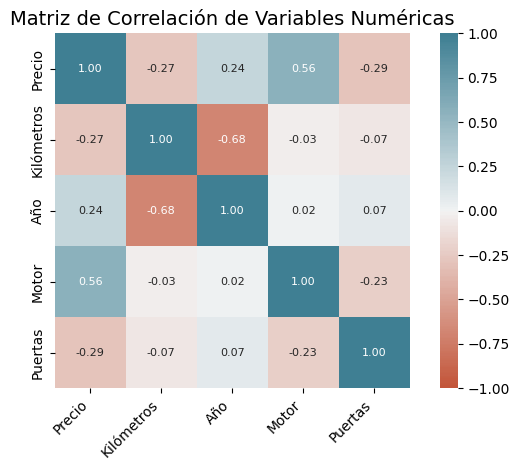

In [ ]:
import seaborn as sns

# Seleccionar las variables numéricas relevantes
variables_numericas = ['Precio', 'Kilómetros', 'Año', 'Motor', 'Puertas']

# Filtrar el DataFrame solo con las variables numéricas
datos_numericos = data[variables_numericas]

# Calcular la matriz de correlación utilizando el método de Pearson
matriz_correlacion = datos_numericos.corr(method='pearson')

# Visualizar la matriz de correlación como un gráfico de calor
heatmap = sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt=".2f",  # Formato de los valores numéricos para mostrar dos decimales
    cbar=True,
    annot_kws={"size": 8},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

# Ajustes en el gráfico
plt.xticks(rotation=45, horizontalalignment='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=14)
plt.tight_layout()  # Ajustar el layout para evitar recortes
plt.show()

La matriz de correlación reveló las siguientes relaciones significativas:

- **Precio vs. Kilómetros:** Se observó una correlación negativa, indicando que a medida que aumentan los kilómetros, el precio tiende a disminuir. Esto sugiere que los vehículos con mayor uso suelen tener un valor más bajo.

- **Precio vs. Año:** La correlación fue positiva, sugiriendo que los vehículos más nuevos tienden a tener un precio más alto, lo cual es consistente con la percepción general de que los autos recientes son más deseables.

- **Precio vs. Motor:** La correlación positiva sugiere que una mayor potencia del motor está asociada con precios más altos, indicando que los compradores valoran las prestaciones superiores.

- **Kilómetros vs. Año:** Se encontró una correlación negativa, sugiriendo que los vehículos más antiguos tienden a tener más kilómetros recorridos, lo cual es lógico dado que han estado en uso por más tiempo.

- **Kilómetros vs. Motor:** La correlación fue débil, indicando que no hay una relación fuerte entre la potencia del motor y la cantidad de kilómetros recorridos.

- **Año vs. Motor:** También se observó una correlación débil, sugiriendo que no hay una relación significativa entre el año de fabricación y el tipo de motor.

El análisis de la matriz de correlación proporciona una visión clara de cómo se relacionan las diferentes variables en el dataset. Comprender estas relaciones puede ser útil para decisiones en compra y venta, así como para futuros estudios de mercado. La identificación de correlaciones significativas puede guiar a los compradores a tomar decisiones informadas y a los vendedores a establecer precios competitivos.

<br>
<br>

pie_de_página.png

<br>
<br>

# **3. Análisis de Regresión Lineal Simple**



La regresión lineal simple es una técnica estadística que se utiliza para entender la relación entre dos variables: una variable dependiente (respuesta) y una variable independiente (predictor). El objetivo es modelar la relación lineal entre estas dos variables para predecir el valor de la variable dependiente basado en el valor de la variable independiente.

<br>

Ejemplo:
- **Variable dependiente:** Es lo que se quiere predecir o explicar. Por ejemplo, el precio de una casa.
- **Variable independiente:** Es la variable que se usa para hacer la predicción. Por ejemplo, el tamaño de la casa en metros cuadrados.
- **Modelo Lineal:** Es la relación entre las variables y se representa mediante una línea recta. En este caso, el modelo lineal podría predecir el precio de una casa basado en su tamaño.


<br>

En nuestro análisis, consideraremos el kilometraje como la variable dependiente. Por lo tanto, realizaremos una regresión lineal simple entre el **Año de Fabricación y el Kilometraje**, con el objetivo de comprender cómo influye el año de fabricación en el kilometraje del automóvil.


<br>

Una vez que tengamos un modelo confiable, podremos usarlo para hacer predicciones sobre el kilometraje (variable dependiente) basándonos en nuevas observaciones del año de fabricación (variable independiente).

<br>



---


## Scikit-learn

La siguiente implementación realiza un análisis de regresión lineal para predecir la cantidad de kilómetros recorridos en función del año. Para ello, utilizamos la librería `scikit-learn` para crear y entrenar el modelo.

- Primero, dividimos los datos en un conjunto de entrenamiento y prueba usando `train_test_split`.

- Luego, creamos el modelo de regresión lineal con `LinearRegression()` y lo entrenamos con los datos de entrenamiento.

- Posteriormente, realizamos predicciones sobre el conjunto de prueba (`X_test`).

- Los resultados se visualizan mediante un gráfico de dispersión que muestra los datos reales y la línea de regresión.

- Finalmente, imprimimos los coeficientes de la regresión (pendiente e intercepto).

<br>


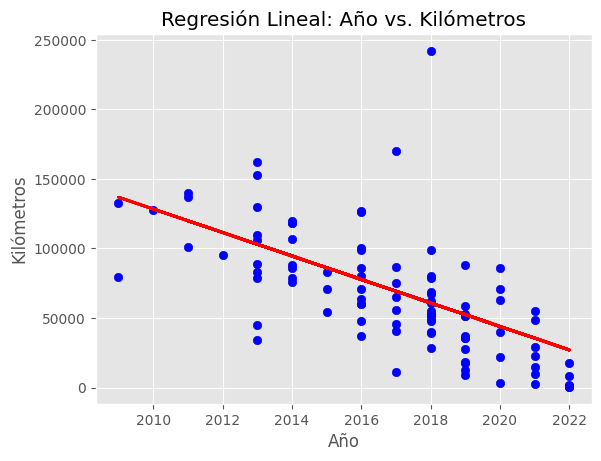



 Coeficiente de regresión: -8440.45 (pendiente de la línea de regresión)

 Intercepto: 17093694.54 ( y=0 )


In [ ]:
# Importamos la librería necesaria. En este caso los módulos específicos de la
# librería 'sklearn'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Definimos las variables independiente (X) y dependiente (y)
X = data[['Año']]  # Variable independiente
y = data['Kilómetros']  # Variable dependiente

# Separamos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
model = LinearRegression()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Hacemos las predicciones
y_pred = model.predict(X_test)

# Visualizamos la regresión
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regresión Lineal: Año vs. Kilómetros')
plt.xlabel('Año')
plt.ylabel('Kilómetros')
plt.show()

# Generamos los coeficientes de la regresión
print(f"\n\n Coeficiente de regresión: {model.coef_[0] :.2f} (pendiente de la línea de regresión)")
print(f"\n Intercepto: {model.intercept_ :.2f} ( y=0 )")



Los resultados (coeficientes) provinientes  del modelo de regresión lineal tienen el siguiente significado:

- **Coeficiente de regresión ( `-8440.45` )**: Este valor representa la pendiente de la línea de regresión, es decir, cuánto cambia la variable dependiente (kilómetros) por cada unidad que cambia la variable independiente (año). **En este caso, el coeficiente es negativo, lo que indica que, a medida que el año aumenta, la cantidad de kilómetros tiende a disminuir.**

  - Específicamente, por cada año que pasa, el modelo predice que los kilómetros disminuyen en aproximadamente 8440.45.

- **Intercepto ( `17093694.54` ):** Este valor es el punto en el que la línea de regresión cruza el eje y. En términos sencillos, es el valor que el modelo predice para la variable dependiente (kilómetros) cuando la variable independiente (año) es 0. Aunque el intercepto en este caso es muy grande, no siempre tiene un significado práctico, especialmente si el valor de 0 para el año no tiene sentido en el contexto (como en nuestro caso: un año "0" para vehículos).

<br>

## Evaluando el Modelo



Para evaluar el modelo de regresión lineal, usaremos métricas como el error cuadrático medio (**MSE**), el error absoluto medio (**MAE**) y el coeficiente de determinación (**R²**). Estas métricas nos pueden dar una idea de qué tan bien se ajusta el modelo a los datos.

<br>


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular el error absoluto medio (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R²)
r2 = r2_score(y_test, y_pred)

print(f"\n\n MSE: {mse :.2f}")
print(f"\n MAE: {mae :.2f}")
print(f"\n R²: {r2 :.2f}")




 MSE: 1082744665.87

 MAE: 23457.59

 R²: 0.44




<br>

$MSE$ **(Error Cuadrático Medio)**: `1082744665.87`

- **Significado**: El **MSE** mide el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales. Un valor más bajo indica que las predicciones están más cerca de los valores reales, o un mejor ajuste del modelo.

- **Interpretación**: En este caso, el MSE es grande (`1082744665.87`), lo que sugiere que el modelo tiene un error considerable al predecir los kilómetros. Sin embargo, el tamaño del MSE depende de la magnitud de los datos (en este caso, los kilómetros), por lo que es importante interpretarlo en el contexto del problema.

<br>

$MAE$ **(Error Absoluto Medio)**: `23457.59`

- **Significado**: El **MAE** mide el promedio de los errores absolutos entre las predicciones y los valores reales. A diferencia del MSE, no eleva los errores al cuadrado, por lo que es menos sensible a los valores atípicos que el MSE y es más fácil de interpretar directamente.

- **Interpretación**: En este caso, el MAE indica que, en promedio, el modelo se desvía en **23,457.59 kilómetros** de los valores reales. Este valor es más fácil de entender que el MSE porque está en las mismas unidades que la variable dependiente (kilómetros).

<br>

$R²$ **(Coeficiente de Determinación)**: `0.44`

- **Significado**: El **R²** indica qué tan bien el modelo explica la variación de la variable dependiente (kilómetros). Toma valores entre 0 y 1:
  - Un **R² de 1** significa que el modelo explica perfectamente toda la variabilidad de los datos.
  - Un **R² de 0** significa que el modelo no explica ninguna variabilidad y es tan malo como predecir el promedio de los datos.

- **Interpretación**: En este caso, el **R² de 0.44** significa que el modelo explica solo el **44% de la variación** de los kilómetros recorridos. Esto sugiere que el modelo no es muy preciso, y podría haber otras variables que afectan los kilómetros que no se están considerando (además del año).



<br>

## Verificación Manual


<br>

Cargamos algunos datos de forma manual:


In [ ]:
entrada_multiple = [[2008], [2011.5], [2014.5]]



Luego usamos este conjunto de datos para predecir con el modelo ya entrenado:


In [ ]:
# Hacemos las predicciones con los nuevos datos
predicciones = model.predict(entrada_multiple)

# Mostramos las predicciones
for i, pred in enumerate(predicciones):
    print(f"\n Predicción para el año {entrada_multiple[i][0]}: {pred:.2f} kilómetros")



 Predicción para el año 2008: 145279.64 kilómetros

 Predicción para el año 2011.5: 115738.08 kilómetros

 Predicción para el año 2014.5: 90416.74 kilómetros


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<br>

Explicación del código:

- `entrada_multiple` : contiene los años para los que se desea hacer predicciones

- `model.predict(entrada_multiple)` : realiza la predicción de kilómetros recorridos para esos años

- El bucle `for` : imprime los resultados de las predicciones para cada uno de los años.

O sea, este código utiliza el modelo entrenado para predecir los kilómetros recorridos en función de los años proporcionados.

<br>
<br>

Pero una forma muy interesante de observar las predicciones sería hacerlo de manera **gráfica**, por tanto procedemos a implementar nuevamente el gráfico de dispersión, pero ahora añadiendo los datos cargados de forma manual ( `entrada_multiple` ):


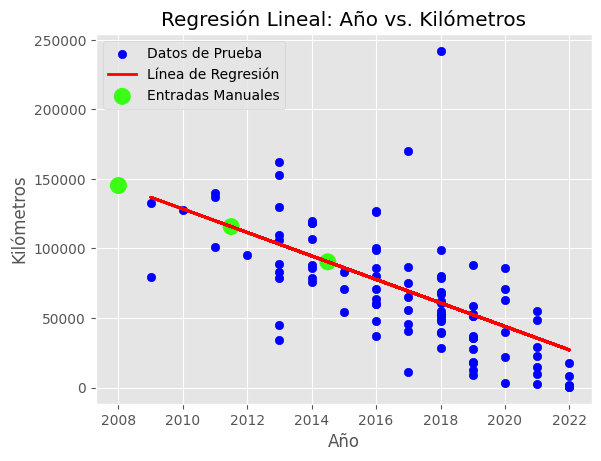

In [ ]:
# Visualizamos la regresión con datos testeados y predicciones
plt.scatter(X_test, y_test, color='blue', label='Datos de Prueba')  # Puntos reales en azul
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')  # Línea de regresión
plt.scatter(entrada_multiple, predicciones, color='#39ff14', s=150, label='Entradas Manuales', edgecolor='none')  # Puntos predichos en verde

# Agregamos etiquetas y título
plt.title('Regresión Lineal: Año vs. Kilómetros')
plt.xlabel('Año')
plt.ylabel('Kilómetros')
plt.legend()
plt.show()


<br>

Aquí lo que se hizo fue:

- Reutilizar la regresión lineal con la que se venía trabajando

- Agregar los datos cargados de forma manual `entrada_multiple`

- Volver a utilizar las `predicciones` hechas más arriba para estos datos

- Visualizar los puntos de prueba ( `X_test` y `y_test` ) en azul y la línea de regresión en rojo

- Resaltar los puntos de `entrada_multiple` en un color diferente


<br>

## Statsmodels
La implementación de regresión lineal de Statsmodels, es más completa que la de Scikitlearn ya que, además de ajustar el modelo, permite calcular los test estadísticos y análisis necesarios para verificar que se cumplen las condiciones sobre las que se basa este tipo de modelos. Statsmodels tiene dos formas de entrenar el modelo:

- Indicando la fórmula del modelo y pasando los datos de entrenamiento como un dataframe que incluye la variable respuesta y los predictores. Esta forma es similar a la utilizada en R.

- Pasar dos matrices, una con los predictores y otra con la variable respuesta. Esta es igual a la empleada por Scikitlearn con la diferencia de que a la matriz de predictores hay que añadirle una primera columna de 1s.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

# Definir las variables independiente (X) y dependiente (y)
X = data[['Año']]  # Variable independiente
y = data['Kilómetros']  # Variable dependiente

# División de los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size=0.8,
                                        random_state=1234,
                                        shuffle=True
                                    )

# Creación del modelo utilizando el modo fórmula (similar a R)
datos_train = pd.concat([X_train, y_train], axis=1)
modelo_formula = smf.ols(formula='Kilómetros ~ Año', data=datos_train)
modelo_formula = modelo_formula.fit()

# Creación del modelo utilizando matrices como en scikit-learn
X_train_const = sm.add_constant(X_train, prepend=True)
modelo_matriz = sm.OLS(endog=y_train, exog=X_train_const)
modelo_matriz = modelo_matriz.fit()

# Mostrar resúmenes de ambos modelos
print("Resumen del modelo utilizando fórmula:")
print(modelo_formula.summary())

print("\nResumen del modelo utilizando matrices:")
print(modelo_matriz.summary())


Resumen del modelo utilizando fórmula:
                            OLS Regression Results                            
Dep. Variable:             Kilómetros   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     350.3
Date:                Sat, 28 Sep 2024   Prob (F-statistic):           1.58e-56
Time:                        10:24:39   Log-Likelihood:                -4744.5
No. Observations:                 400   AIC:                             9493.
Df Residuals:                     398   BIC:                             9501.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1

## Intervalos de confianza de los coeficientes

Se calculan y muestran los intervalos de confianza para los coeficientes de ambos modelos.

In [ ]:
# Calcular los intervalos de confianza para los coeficientes del modelo en la forma de fórmula
# (similar a R)
intervalos_ci_formula = modelo_formula.conf_int(alpha=0.05)
intervalos_ci_formula.columns = ['2.5%', '97.5%']

# Calcular los intervalos de confianza para los coeficientes del modelo en la forma de matrices
intervalos_ci_matriz = modelo_matriz.conf_int(alpha=0.05)
intervalos_ci_matriz.columns = ['2.5%', '97.5%']

# Mostrar los intervalos de confianza
print("\nIntervalos de confianza para los coeficientes (modelo fórmula):")
print(intervalos_ci_formula)

print("\nIntervalos de confianza para los coeficientes (modelo matrices):")
print(intervalos_ci_matriz)


Intervalos de confianza para los coeficientes (modelo fórmula):
                 2.5%       97.5%
Intercept 15743593.47 19421525.93
Año          -9594.85    -7770.80

Intervalos de confianza para los coeficientes (modelo matrices):
             2.5%       97.5%
const 15743593.47 19421525.93
Año      -9594.85    -7770.80


<br>

## Predicciones

Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular las predicciones de dos formas:

- `.predict():` devuelve únicamente el valor de las predicciones.

- `get_prediction().summary_frame():` devuelve, además de las predicciones, los intervalos de confianza asociados.

In [ ]:
# Predicciones con intervalo de confianza del 95%
predicciones = modelo_matriz.get_prediction(exog=X_train_const).summary_frame(alpha=0.05)

# Mostrar las primeras 4 predicciones con intervalos de confianza
predicciones.head(10)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
296,95353.90,2036.85,91349.56,99358.24,27672.53,163035.27
220,130085.19,3413.37,123374.70,136795.69,62189.95,197980.43
0,25891.32,3131.23,19735.50,32047.13,-41951.35,93733.98
255,112719.55,2653.13,107503.65,117935.45,44955.70,180483.39
335,60622.61,1879.70,56927.23,64317.99,-7041.18,128286.40
141,69305.43,1743.99,65876.85,72734.02,1655.68,136955.18
225,34574.14,2755.20,29157.58,39990.70,-33205.45,102353.72
322,104036.72,2319.21,99477.30,108596.15,36320.25,171753.20
342,51939.78,2110.80,47790.08,56089.49,-15750.34,119629.91
51,34574.14,2755.20,29157.58,39990.70,-33205.45,102353.72


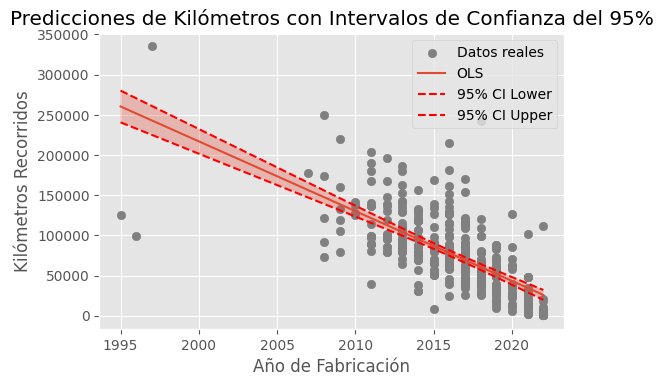

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Predicciones con intervalo de confianza del 95%
predicciones = modelo_matriz.get_prediction(exog=X_train_const).summary_frame(alpha=0.05)
predicciones['x'] = X_train['Año']
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

# Gráfico del modelo
fig, ax = plt.subplots(figsize=(6, 3.84))

# Gráfico de dispersión de los datos reales
ax.scatter(predicciones['x'], predicciones['y'], marker='o', color="gray", label='Datos reales')

# Línea de predicción
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")

# Líneas de los intervalos de confianza
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='red', label="95% CI Lower")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='red', label="95% CI Upper")

# Rellenar el área entre los intervalos de confianza
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.3)

ax.legend()
ax.set_xlabel('Año de Fabricación')
ax.set_ylabel('Kilómetros Recorridos')
ax.set_title('Predicciones de Kilómetros con Intervalos de Confianza del 95%')

plt.show()

In [ ]:
# Calcular las predicciones en el conjunto de test
X_test_const = sm.add_constant(X_test, prepend=True)
predicciones_test = modelo_matriz.predict(exog=X_test_const)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y_true=y_test, y_pred=predicciones_test))
print(f"El error (RMSE) de test es: {rmse}")

El error (RMSE) de test es: 33963.716211818944


<br>

## Interpretación

La columna (coef) presenta los valores estimados para los parámetros de la ecuación del modelo lineal (β₀ y β₁), que corresponden a la ordenada en el origen (intercepto) y a la pendiente. También se incluyen los errores estándar, el valor del estadístico t y el p-value (dos colas) para cada uno de los parámetros. Esto permite evaluar si los predictores son significativamente diferentes de cero y, por lo tanto, relevantes en el modelo.

En este caso, ambos parámetros son significativos (p-values < 0.05), lo que indica que el año de fabricación tiene un impacto significativo en los kilómetros recorridos.

El valor de R-squared es 0.468, lo que significa que el modelo es capaz de explicar aproximadamente el 46.8% de la variabilidad observada en la variable respuesta (kilómetros). Además, el p-value obtenido en el test F (Prob (F-statistic) = 1.58e-56) sugiere que la varianza explicada por el modelo es significativamente mayor que la esperada por azar.

La ecuación del modelo lineal resultante es:

kilómetros = β₀ + β₁ x (año de fabricación)

Esto implica que por cada año adicional en el año de fabricación, se espera que los kilómetros recorridos aumenten en promedio β₁ unidades.

El error de prueba del modelo, medido por el RMSE, es de 33963.72. Esto significa que las predicciones del modelo se desvían en promedio 33963.72 kilómetros del valor real, lo que sugiere que, aunque el modelo proporciona una relación significativa, todavía hay variabilidad en los datos que no está siendo capturada.

<br>
<br>

pie_de_página.png

<br>
<br>

# **4. Consideraciones y Conclusiones**



<br>

El análisis de regresión lineal realizado nos permitió modelar la relación entre el año de fabricación de los autos y la cantidad de kilómetros recorridos. Sin embargo, los resultados obtenidos muestran que el modelo actual presenta limitaciones en términos de precisión, dado que el valor de R-squared (0.468) indica que solo se explica aproximadamente el 46.8% de la variabilidad en los datos. Esto sugiere que existen otros factores relevantes que no están siendo considerados.

Dada esta situación, consideramos seguir explorando diversas alternativas para mejorar la precisión del modelo. Entre las posibles acciones a considerar se encuentran:

- **Inclusión de nuevas variables predictoras:** Identificar y agregar variables adicionales, como el tipo de combustible, el mantenimiento del auto, o el uso (urbano vs. rural), podría proporcionar una visión más completa de los factores que afectan el kilometraje.

- **Técnicas de modelado avanzadas:** Experimentar con modelos más sofisticados, como la regresión polinómica, modelos de árboles de decisión, o técnicas de aprendizaje automático, podría ayudar a capturar relaciones no lineales y mejorar la capacidad predictiva del modelo.

- **Validación y refinamiento del modelo:** Realizar validaciones cruzadas y ajustar los hiperparámetros del modelo permitirá evaluar su rendimiento en diferentes subconjuntos de datos y optimizar su precisión.

Este análisis preliminar nos brinda una visión general de la relación entre el año del automóvil y los kilómetros recorridos; sin embargo, es necesario refinar el modelo para obtener predicciones más precisas y aplicables en un contexto práctico. La exploración de alternativas y la incorporación de variables adicionales serán pasos fundamentales para profundizar en este análisis y lograr resultados más confiables.


<br>
<br>

## Proyección a Futuro


<br>

Reafirmando lo dicho anteriormente, sería interesante explorar diversas alternativas para mejorar la precisión del modelo, y entre las acciones propuestas se incluye la incorporación de nuevas variables predictoras que puedan capturar de forma más completa los factores que afectan el kilometraje u otras predicciones.

<br>

En particular, el uso de variables categóricas podría enriquecer considerablemente las capacidades de predicción. Para ello, sería necesario convertir dichos datos categóricos a numéricos mediante técnicas como **one-hot encoding** o **label encoding**, dependiendo de la naturaleza de la variable. Esto permitiría ampliar la información capturada por el modelo, ya que actualmente se está trabajando exclusivamente con variables numéricas.
